# Lab 6: Image Segmentation with OpenCV
Dr. Amr Amin  
Ahmed Alqassas  
Autumn 2024-25  

---

## Image Segmentation

Image segmentation is a fundamental technique in digital image processing and computer vision. **It involves partitioning a digital image into multiple segments (regions or objects) to simplify and analyze an image by separating it into meaningful components.** This process makes image processing more efficient by focusing on specific regions of interest.
> [Source: GeeksforGeeks](https://www.geeksforgeeks.org/explain-image-segmentation-techniques-and-applications/)  

### The output of segmentation is often referred to as a mask:
- A mask is typically a binary or multi-label image where each pixel represents a specific segment or class.
- In binary segmentation, the mask is a binary image where one value (e.g., 1 or white) represents the foreground/object, and the other value (e.g., 0 or black) represents the background.
- In multi-class segmentation, the mask can have multiple values (e.g., 0, 1, 2) to represent different segments or object categories.
> The mask serves as a template or overlay that highlights the regions of interest in the original image.
---

### 1. Simple Thresholding
Thresholding is a simple technique that converts grayscale images into binary images by applying a threshold value. Learn more about thresholding in the OpenCV documentation: [Thresholding in OpenCV](https://docs.opencv.org/4.x/db/d8e/tutorial_threshold.html).  

#### 5 Types of Thresholding:
- 0: Binary  

$
dst =
\begin{cases} 
\text{max} & \text{if } src > thresh \\ 
0 & \text{otherwise}
\end{cases}
$
- 1: Binary Inverted   

$
dst =
\begin{cases} 
\text{0} & \text{if } src > thresh \\ 
max & \text{otherwise}
\end{cases}
$

- 2: Threshold Truncated    

$
dst =
\begin{cases} 
\text{thresh} & \text{if } src > thresh \\ 
src & \text{otherwise}
\end{cases}
$

- 3: Threshold to Zero    

$
dst =
\begin{cases} 
\text{src} & \text{if } src > thresh \\ 
0 & \text{otherwise}
\end{cases}
$

- 4: Threshold to Zero Inverted    

$
dst =
\begin{cases} 
\text{0} & \text{if } src > thresh \\ 
src & \text{otherwise}
\end{cases}
$

#### Example Code:

In [ ]:
import cv2 

thrshld = 127

# Load a grayscale image
img = cv2.imread('lena.png', 0)                    # 0: Grayscale image

_, thresh_binary = cv2.threshold(img,              # Src image
                                thrshld,           # Threshold value
                                255,               # Max value
                                0)                 # Threshold type: Binary

_, thresh_binary_inverted = cv2.threshold(img,     # Src image
                                thrshld,           # Threshold value
                                255,               # Max value
                                1)                 # Threshold type: Binary Inverted

_, thresh_truncated = cv2.threshold(img,           # Src image
                                thrshld,           # Threshold value
                                255,               # Max value
                                2)                 # Threshold type: Truncated

_, thresh_to_zero = cv2.threshold(img,             # Src image
                                thrshld,           # Threshold value
                                255,               # Max value
                                3)                 # Threshold type: to zero

_, thresh_to_zero_inverted = cv2.threshold(img,    # Src image
                                thrshld,           # Threshold value
                                255,               # Max value
                                4)                 # Threshold type: to zero inverted

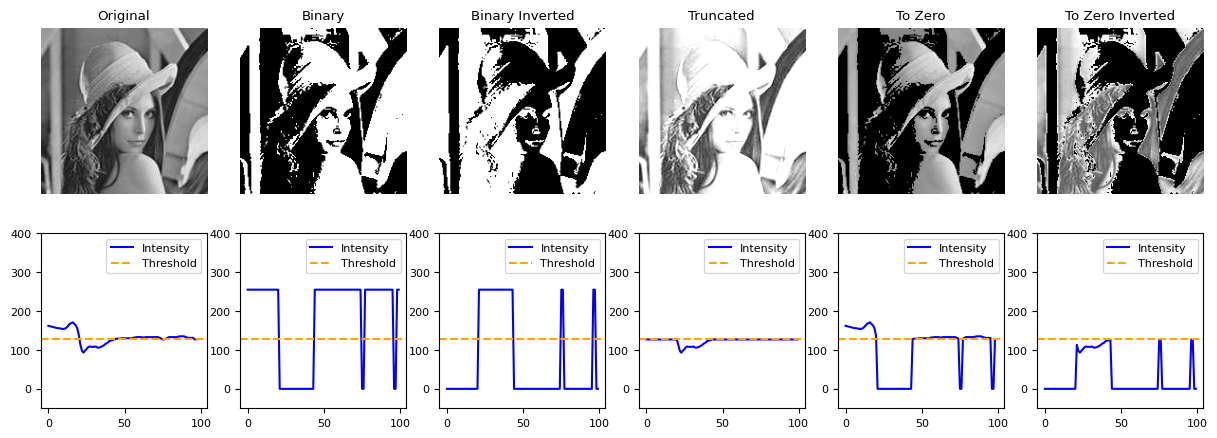

In [56]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

images = {'Original': img,
          'Binary': thresh_binary,
          'Binary Inverted': thresh_binary_inverted,
          'Truncated': thresh_truncated,
          'To Zero': thresh_to_zero,
          'To Zero Inverted': thresh_to_zero_inverted}

fig, ax = plt.subplots(2, len(images), figsize=(15, 5))
ax=ax.ravel()

for i, (title, image) in enumerate(images.items()):  # Use enumerate and unpack items
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(title)
    ax[i].axis('off')
    ax[i+6].plot(image.ravel()[0:100],color='blue', label='Intensity')
    ax[i+6].axhline(thrshld, color='orange', label='Threshold', linestyle='--')
    ax[i+6].set_ylim([-50, 400])
    ax[i+6].legend()

#### Advantages and Limitations of segmentation using thresholding    
Thresholding struggles when the foreground and background share similar intensity values or when the image has uneven lighting, complex textures, or overlapping objects. In such cases, more advanced segmentation methods like region-based segmentation, clustering (e.g., k-means), edge detection, or deep learning approaches (e.g., U-Net) are often required.  

| **Aspect**         | **Advantages**                          | **Limitations**                          |
|---------------------|------------------------------------------|------------------------------------------|
| **Simplicity**      | Easy to use and fast.                   | Fails with uneven lighting.              |
| **Performance**     | Works well for clear, simple images.    | Struggles with noisy or complex images.  |
| **Accuracy**        | Good for high-contrast images.          | Poor with similar foreground/background. |
| **Adaptability**    | Adaptive methods handle some variation. | Needs careful tuning of parameters.      |
| **Output Quality**  | Clear results in ideal conditions.      | Can give rough edges in noisy images.    |  

#### Use Cases Where Thresholding Performs Well
1. **Document Processing**  
   - Converts scanned documents into binary for OCR.  
   - Example: Processing handwritten or printed text.

2. **Barcodes and QR Code Detection**  
   - Simplifies patterns for easier decoding.  
   - Example: Extracting barcodes from product images.

3. **License Plate Recognition**  
   - Extracts text regions from plates under good lighting.  
   - Example: Binarizing license plate characters.

4. **Signature and Logo Extraction**  
   - Isolates signatures or logos for verification.  
   - Example: Extracting a logo from a document.

---


### 2. Adaptive Thresholding
Adaptive thresholding calculates thresholds for smaller regions of the image, making it useful for images with varying lighting.

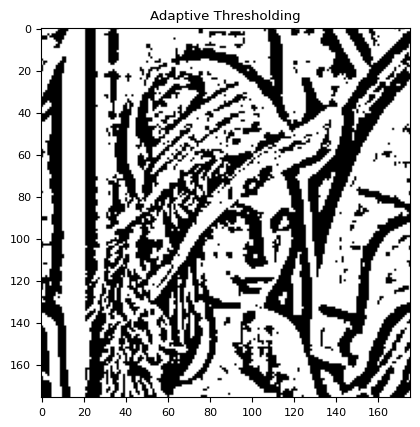

In [57]:
thresh_adaptive = cv2.adaptiveThreshold(img,
                                        255,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        11,
                                        2)

plt.imshow(thresh_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()

---

### 3. Otsu's Binarization
Otsu's method determines the optimal threshold value automatically.

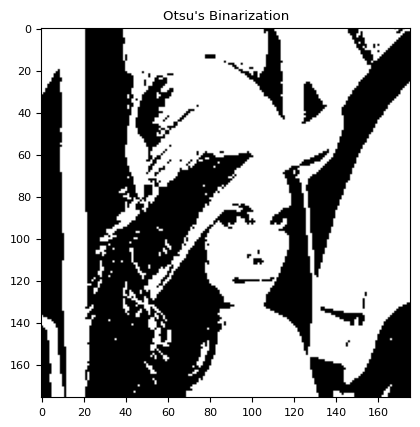

In [58]:
_, thresh_otsu = cv2.threshold(img,
                               0,
                               255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu's Binarization")
plt.show()

---

### 4. Edge-Based Segmentation with Canny Edge Detector

The Canny Edge Detector is a multi-stage algorithm to detect edges in an image. It is one of the most widely used methods for edge detection. Learn more about the Canny algorithm here: [Canny Edge Detection in OpenCV](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html).  

#### Example Code:

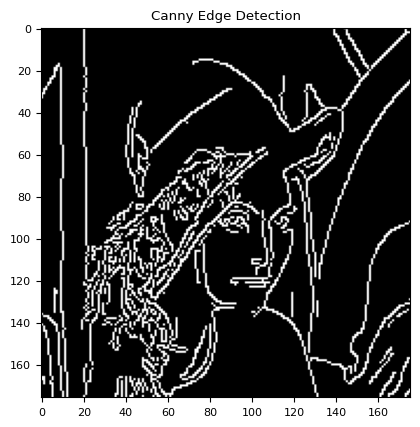

In [59]:
edges = cv2.Canny(img, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()